In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlsurfacelayer.metrics import pearson_r2, hellinger_distance
from mlmicrophysics.explain import partial_dependence_1d, feature_importance
from mlsurfacelayer.mo import mo_similarity
from keras.models import load_model

import pickle
from os.path import join
import yaml

Using TensorFlow backend.


In [3]:
ls /Users/dgagne/data/cabauw_surface_layer_models/

friction_velocity/                   surface_layer_model_metrics.csv
friction_velocity_random_forest.pkl  surface_layer_model_predictions.csv
moisture_scale/                      temperature_scale/
moisture_scale_random_forest.pkl     temperature_scale_random_forest.pkl


In [56]:
model_path = "/Users/dgagne/data/cabauw_surface_layer_models_20190712_norad/"
slm_preds = pd.read_csv(join(model_path, "surface_layer_model_predictions.csv"), index_col="Time", parse_dates=["Time"])

In [3]:
metrics = pd.read_csv(join(model_path, "surface_layer_model_metrics.csv"), index_col="Model")

In [ ]:
with open(join(model_path, ))

In [4]:
metrics

,mean_squared_error,mean_absolute_error,mean_error,pearson_r2,hellinger_distance
Model,,,,,
friction_velocity-random_forest,0.001881,0.032720,0.002884,0.924572,0.000547
friction_velocity-neural_network,0.001954,0.033319,0.002837,0.921913,0.000478
friction_velocity-mo,0.002651,0.039124,-0.014412,0.901001,0.004848
temperature_scale-random_forest,0.003116,0.031687,0.001447,0.805387,0.003257
temperature_scale-neural_network,0.003023,0.031545,-0.005594,0.817087,0.004988
temperature_scale-mo,0.007323,0.050734,0.005359,0.569173,0.020306
moisture_scale-random_forest,0.016163,0.056892,-0.005632,0.695762,0.002047
moisture_scale-neural_network,0.014648,0.060569,-0.010322,0.726660,0.005432
moisture_scale-mo,0.043436,0.119338,0.005710,0.192845,0.072993


In [76]:
data_path = "/Users/dgagne/data/cabauw_derived_data_20190712.csv"
data = pd.read_csv(data_path, index_col="Time", parse_dates=["Time"])
data = data.dropna()
test_data = data.loc[data.index >= pd.Timestamp("2011-01-01")]
train_data = data.loc[data.index < pd.Timestamp("2011-01-01")]

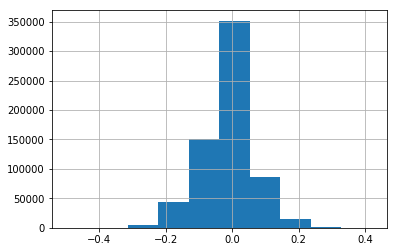

In [5]:
data["potential temperature skin change_40 m_K m-1"].hist()

/Users/dgagne/miniconda3/envs/ml/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(734659.0, 734665.0)

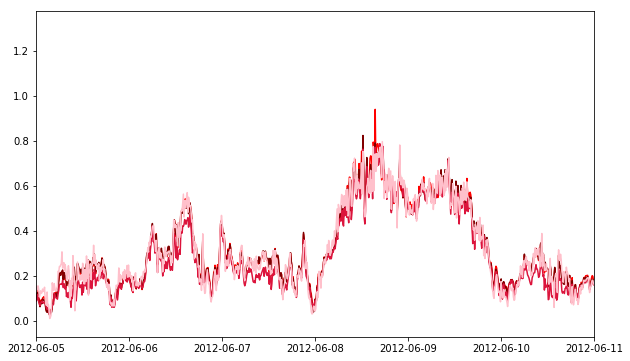

In [6]:
plt.figure(figsize=(10, 6))
#plt.pcolormesh(test_data.index, np.array([-1, 0.8]), 
#               np.where(test_data["zenith_0 m_degrees"] > 90, 1, 0).reshape(-1, 1).T, vmin=0, vmax=3, cmap="Greys")
plt.plot(slm_preds.index, slm_preds["friction_velocity-random_forest"], label=r"RF $u *$", color="red")
plt.plot(slm_preds.index, slm_preds["friction_velocity-neural_network"], label=r"NN $u *$", color="maroon")
plt.plot(slm_preds.index, slm_preds["friction_velocity-mo"], label=r"MO $u *$", color="crimson")
plt.plot(slm_preds.index, slm_preds["friction velocity_surface_m s-1"], label=r"MO $u *$", color="pink")

plt.xlim("2012-06-05", "2012-06-11")

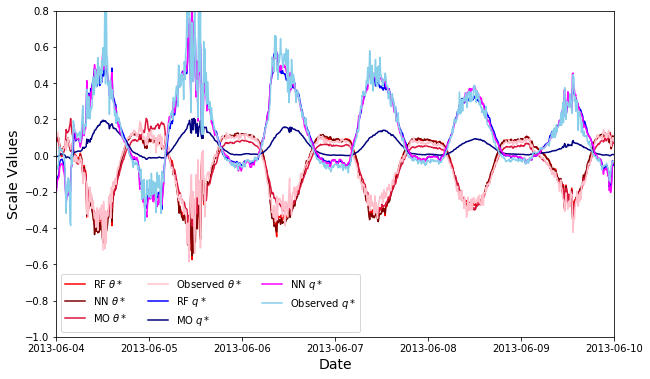

In [28]:
plt.figure(figsize=(10, 6))
#plt.pcolormesh(test_data.index, np.array([-1, 0.8]), 
#               np.where(test_data["zenith_0 m_degrees"] > 90, 1, 0).reshape(-1, 1).T, vmin=0, vmax=3, cmap="Greys")
plt.plot(slm_preds.index, slm_preds["temperature_scale-random_forest"], label=r"RF $\theta *$", color="red")
plt.plot(slm_preds.index, slm_preds["temperature_scale-neural_network"], label=r"NN $\theta *$", color="maroon")
plt.plot(slm_preds.index, slm_preds["temperature_scale-mo"], label=r"MO $\theta *$", color="crimson")

plt.plot(slm_preds.index, slm_preds["temperature scale_surface_K"], label=r"Observed $\theta*$", color="pink")
plt.plot(slm_preds.index, slm_preds["moisture_scale-random_forest"], label="RF $q*$", color="blue")
plt.plot(slm_preds.index, slm_preds["moisture_scale-mo"], label="MO $q*$", color="navy")
plt.plot(slm_preds.index, slm_preds["moisture_scale-neural_network"], label=r"NN $q *$", color="magenta")
plt.plot(slm_preds.index, slm_preds["moisture scale_surface_g kg-1"], label="Observed $q*$", color="skyblue")
#plt.plot(slm_preds.index, test_data["bulk richardson_10 m_"], color="green")

plt.xlim("2013-06-04", "2013-06-10")
plt.ylim(-1, 0.8)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Scale Values", fontsize=14)
plt.legend(ncol=3)
plt.savefig(join(model_path, "scale_ts.png"), dpi=200, bbox_inches="tight")

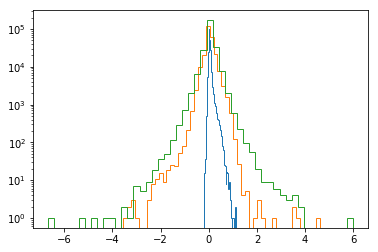

In [8]:
plt.hist(slm_preds["moisture_scale-mo"], bins=50, histtype="step")
plt.hist(slm_preds["moisture_scale-random_forest"], bins=50, histtype="step")
plt.hist(slm_preds["moisture scale_surface_g kg-1"], bins=50, histtype="step")

plt.gca().set_yscale("log")

/Users/dgagne/miniconda3/envs/ml/lib/python3.6/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


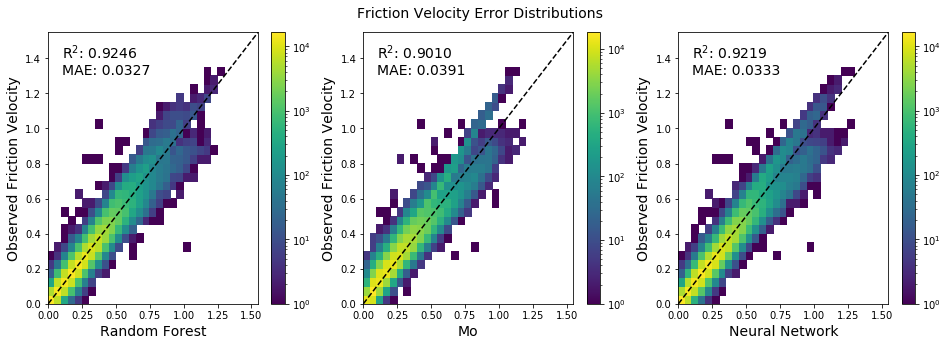

In [29]:
fig = plt.figure(figsize=(16, 5))
scale_bins = np.arange(0, 1.6, 0.05)
models = ["random_forest", "mo", "neural_network"]
output_label = "friction velocity_surface_m s-1"
output_type = "friction_velocity"
metric_loc = (0.1, 1.3)
for i in range(1, 4):
    plt.subplot(1, 3, i)

    _= plt.hist2d(slm_preds[output_type + "-" + models[i - 1]], 
               slm_preds[output_label], bins=scale_bins,
               norm=LogNorm(), cmin=1, cmap="viridis")
    plt.plot(scale_bins, scale_bins, 'k--')
    plt.xlabel(models[i-1].replace("_", " ").title(), fontsize=14)
    plt.ylabel(r"Observed " + output_type.replace("_", " ").title(), fontsize=14)
    plt.colorbar()
    r2_val = metrics.loc[output_type + "-" + models[i-1], "pearson_r2"]
    mae = metrics.loc[output_type + "-" + models[i-1], "mean_absolute_error"]
    plt.text(metric_loc[0], metric_loc[1], f"R$^2$: {r2_val:0.4f}\nMAE: {mae:0.4f}", fontsize=14)
fig.suptitle(output_type.replace("_", " ").title() + " Error Distributions", fontsize=14, y=0.95)
plt.savefig(join(model_path, output_type + "_errors.png"), dpi=200, bbox_inches="tight")
#plt.ylabel("Observed", fontsize=12)

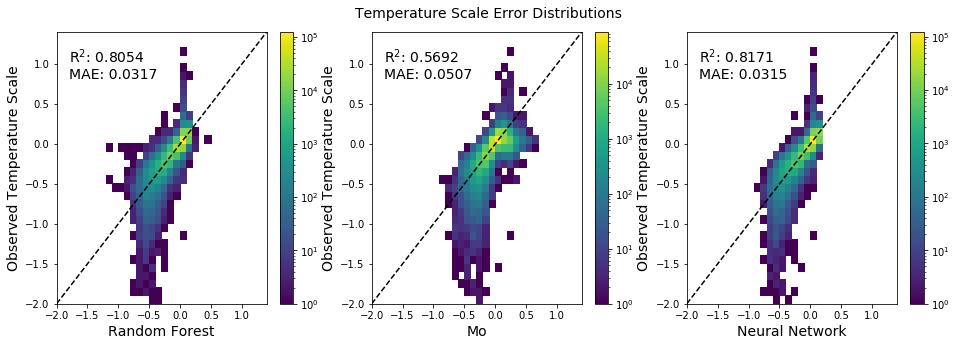

In [30]:
fig = plt.figure(figsize=(16, 5))
scale_bins = np.arange(-2, 1.5, 0.1)
models = ["random_forest", "mo", "neural_network"]
output_label = "temperature scale_surface_K"
output_type = "temperature_scale"
metric_loc = (-1.8, 0.8)
for i in range(1, 4):
    plt.subplot(1, 3, i)

    _= plt.hist2d(slm_preds[output_type + "-" + models[i - 1]], 
               slm_preds[output_label], bins=scale_bins,
               norm=LogNorm(), cmin=1, cmap="viridis")
    plt.plot(scale_bins, scale_bins, 'k--')
    plt.xlabel(models[i-1].replace("_", " ").title(), fontsize=14)
    plt.ylabel(r"Observed " + output_type.replace("_", " ").title(), fontsize=14)
    plt.colorbar()
    r2_val = metrics.loc[output_type + "-" + models[i-1], "pearson_r2"]
    mae = metrics.loc[output_type + "-" + models[i-1], "mean_absolute_error"]
    plt.text(metric_loc[0], metric_loc[1], f"R$^2$: {r2_val:0.4f}\nMAE: {mae:0.4f}", fontsize=14)
fig.suptitle(output_type.replace("_", " ").title() + " Error Distributions", fontsize=14, y=0.95)
plt.savefig(join(model_path, output_type + "_errors.png"), dpi=200, bbox_inches="tight")
#plt.ylabel("Observed", fontsize=12)

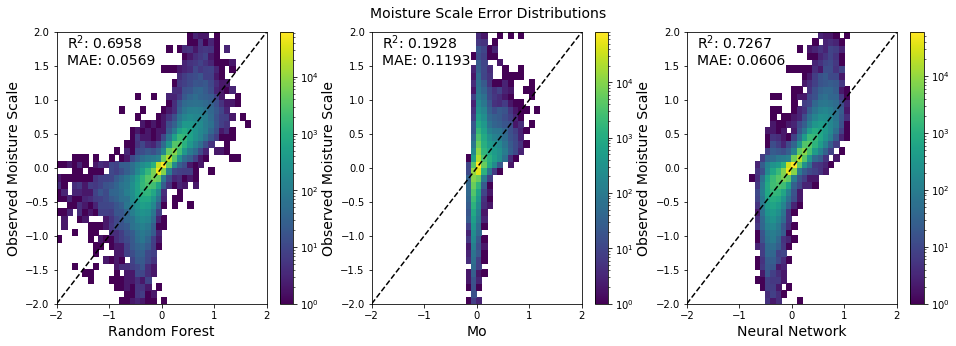

In [31]:
fig = plt.figure(figsize=(16, 5))
scale_bins = np.arange(-2, 2.1, 0.1)
models = ["random_forest", "mo", "neural_network"]
output_label = "moisture scale_surface_g kg-1"
output_type = "moisture_scale"
metric_loc = (-1.8, 1.5)
for i in range(1, 4):
    plt.subplot(1, 3, i)

    _= plt.hist2d(slm_preds[output_type + "-" + models[i - 1]], 
               slm_preds[output_label], bins=scale_bins,
               norm=LogNorm(), cmin=1, cmap="viridis")
    plt.plot(scale_bins, scale_bins, 'k--')
    plt.xlabel(models[i-1].replace("_", " ").title(), fontsize=14)
    plt.ylabel(r"Observed " + output_type.replace("_", " ").title(), fontsize=14)
    plt.colorbar()
    r2_val = metrics.loc[output_type + "-" + models[i-1], "pearson_r2"]
    mae = metrics.loc[output_type + "-" + models[i-1], "mean_absolute_error"]
    plt.text(metric_loc[0], metric_loc[1], f"R$^2$: {r2_val:0.4f}\nMAE: {mae:0.4f}", fontsize=14)
fig.suptitle(output_type.replace("_", " ").title() + " Error Distributions", fontsize=14, y=0.95)
plt.savefig(join(model_path, output_type + "_errors.png"), dpi=200, bbox_inches="tight")
#plt.ylabel("Observed", fontsize=12)

In [157]:
slm_preds["moisture_scale-mo"].max()

3.6426282

In [33]:
stable = test_data["bulk richardson_10 m_"] > 0.1
unstable = test_data["bulk richardson_10 m_"] < -0.1
print(mean_absolute_error(slm_preds.loc[stable, "temperature scale_surface_K"], 
                    slm_preds.loc[stable, "temperature_scale-random_forest"]))
print(mean_absolute_error(slm_preds.loc[stable, "temperature scale_surface_K"], 
                    slm_preds.loc[stable, "temperature_scale-neural_network"]))
print(mean_absolute_error(slm_preds.loc[stable, "temperature scale_surface_K"], 
                    slm_preds.loc[stable, "temperature_scale-mo"]))
print(mean_absolute_error(slm_preds.loc[stable, "temperature scale_surface_K"].values, 
                    np.ones(stable.sum()) * slm_preds.loc[stable, "temperature scale_surface_K"].mean()))
print(mean_absolute_error(slm_preds.loc[unstable, "temperature scale_surface_K"], 
                    slm_preds.loc[unstable, "temperature_scale-random_forest"]))
print(mean_absolute_error(slm_preds.loc[unstable, "temperature scale_surface_K"], 
                    slm_preds.loc[unstable, "temperature_scale-neural_network"]))
print(mean_absolute_error(slm_preds.loc[unstable, "temperature scale_surface_K"], 
                    slm_preds.loc[unstable, "temperature_scale-mo"]))
print(mean_absolute_error(slm_preds.loc[unstable, "temperature scale_surface_K"].values, 
                    np.ones(unstable.sum()) * slm_preds.loc[unstable, "temperature scale_surface_K"].mean()))


0.03270282905192525
0.031227087853823852
0.09432598780410116
0.04632545117426029
0.075663913987383
0.07658757096338199
0.098530768733803
0.14542346683531596


(-10, 10)

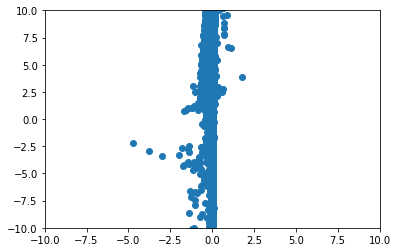

In [9]:
phih = 0.4 * 10 / slm_preds["temperature_scale-random_forest"] * -test_data["potential temperature skin change_10 m_K m-1"]
z_o_l = 0.4 * 9.81 / test_data["potential temperature_10 m_K"] * 10 *  slm_preds["temperature_scale-random_forest"] / slm_preds["friction_velocity-random_forest"]
plt.scatter(z_o_l, phih)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

(-10, 20)

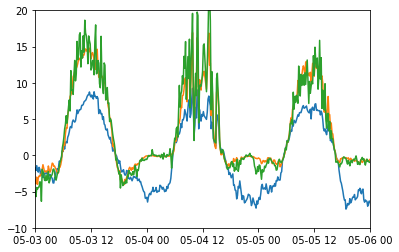

In [30]:
plt.plot(test_data["potential temperature skin change_10 m_K m-1"] * 10)
plt.plot(-test_data["air density_10 m_kg m-3"] * 1005 * slm_preds["friction_velocity-random_forest"] * slm_preds["temperature_scale-random_forest"] / 10)
plt.plot(test_data["sensible heat flux_surface_W m-2"]/ 10)
plt.xlim("2011-05-03", "2011-05-06")
plt.ylim(-10, 20)

Text(0.5, 0, '$\\theta_{s}-\\theta_{10}$ (K)')

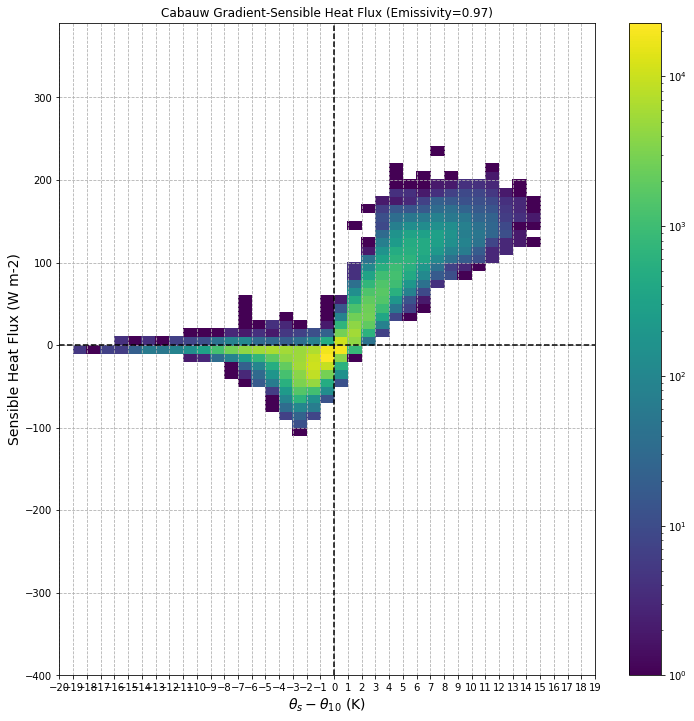

In [43]:
plt.figure(figsize=(12, 12))
rf_sh = -test_data["air density_10 m_kg m-3"] * 1005 * slm_preds["friction_velocity-random_forest"] * slm_preds["temperature_scale-random_forest"]
t_diff = test_data["potential temperature skin change_10 m_K m-1"] * 10
plt.hist2d(t_diff, rf_sh, (np.arange(-20, 20), np.arange(-400, 400, 10)), cmin=1, norm=LogNorm())
plt.plot(np.arange(-20, 20, 1), np.zeros(40), 'k--')
plt.plot(np.zeros(80), np.arange(-400, 400, 10),  'k--')
plt.colorbar()
plt.grid(linestyle="--")
plt.xticks(np.arange(-20, 20, 1))
plt.title("Cabauw Gradient-Sensible Heat Flux (Emissivity=0.97)")
plt.ylabel("Sensible Heat Flux (W m-2)", fontsize=14)
plt.xlabel("$\\theta_{s}-\\theta_{10}$ (K)", fontsize=14)

In [43]:
test_data["potential temperature skin change_10 m_K m-1"].min()

221.13923554534855

In [55]:
with open("../config/surface_layer_training_reduced.yml") as config_file:
    config = yaml.load(config_file)
    

In [74]:
input_cols = config["input_columns"]
output_cols = config["output_columns"]

In [51]:
scalers = dict()
for output_type in config["output_types"]:
    with open(join(model_path, output_type + "_scaler.pkl"), "rb") as sc_pkl:
        scalers[output_type] = pickle.load(sc_pkl)

In [59]:
random_forests = dict()
neural_nets = dict()
for output_type in config["output_types"]:
    with open(join(model_path, output_type + "-random_forest.pkl"), "rb") as rf_pkl:
        random_forests[output_type] = pickle.load(rf_pkl)
    neural_nets[output_type] = load_model(join(model_path, output_type + "-neural_network.h5"))

In [35]:
sub_indices = np.arange(test_data.shape[0])
sub_indices = np.random.permutation(sub_indices)[:20000]
sub_test = test_data.iloc[sub_indices]

In [69]:
test_arr = np.array([[0.201527029,       9.99761596E-02, -0.508617342,       6.93597031,       7.83227587]])
test_arr = np.array([[0.355715305,      0.175081089,      -1.13653278,       6.45518494,       7.29492378]])

In [70]:
random_forests["temperature_scale"].predict(test_arr)

array([-0.25214905])

In [71]:
tree_preds = np.zeros(len(random_forests["temperature_scale"].estimators_))
for t, tree in enumerate(random_forests["temperature_scale"].estimators_):
    tree_preds[t] = tree.predict(test_arr)

(array([ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
         3.,  3.,  8., 24., 40.,  7.,  7.]),
 array([-1.37336158, -1.30480485, -1.23624812, -1.1676914 , -1.09913467,
        -1.03057794, -0.96202121, -0.89346448, -0.82490775, -0.75635102,
        -0.68779429, -0.61923757, -0.55068084, -0.48212411, -0.41356738,
        -0.34501065, -0.27645392, -0.20789719, -0.13934047, -0.07078374,
        -0.00222701]),
 <a list of 20 Patch objects>)

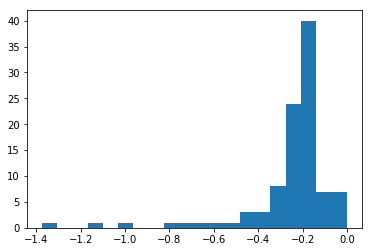

In [72]:
plt.hist(tree_preds, bins=20)

In [81]:
input_cols["temperature_scale"]

['potential temperature skin change_10 m_K m-1',
 'potential temperature skin change_20 m_K m-1',
 'bulk richardson_10 m_',
 'wind speed_10 m_m s-1',
 'wind speed_20 m_m s-1']

In [85]:
slm_preds

,friction_velocity-random_forest,friction_velocity-neural_network,friction_velocity-mo,temperature_scale-random_forest,temperature_scale-neural_network,temperature_scale-mo,moisture_scale-random_forest,moisture_scale-neural_network,moisture_scale-mo,sensible heat flux_surface_W m-2,latent heat flux_surface_W m-2,bulk richardson_10 m_,air density_10 m_kg m-3,obukhov length_surface_m,friction velocity_surface_m s-1,moisture scale_surface_g kg-1,temperature scale_surface_K
Time,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0.118364,0.111111,0.089354,0.093676,0.073323,0.063500,-0.089874,-0.059394,-0.031066,-8.553250,24.904484,0.094289,1.287995,14.873576,0.112063,0.076188,0.058993
2011-01-01 00:10:00,0.150953,0.140587,0.130697,0.100829,0.084956,0.071402,-0.073341,-0.057839,-0.036997,-12.130809,26.084705,0.073048,1.286758,19.586240,0.138013,0.064857,0.068002
2011-01-01 00:20:00,0.148050,0.140872,0.132361,0.095292,0.084012,0.060271,-0.067732,-0.047641,-0.030971,-6.564411,14.481045,0.066185,1.287124,18.594852,0.110538,0.044942,0.045932
2011-01-01 00:30:00,0.149630,0.146180,0.143080,0.085008,0.075472,0.045438,-0.043852,-0.027558,-0.022796,-10.246613,19.966805,0.050652,1.287490,7.034627,0.092739,0.073840,0.085433
2011-01-01 00:40:00,0.135524,0.130407,0.128437,0.077693,0.068447,0.037872,-0.033869,-0.020648,-0.018219,-8.730087,17.807606,0.051846,1.288221,7.761244,0.090849,0.067187,0.074261
2011-01-01 00:50:00,0.159843,0.157242,0.153953,0.094929,0.087417,0.057585,-0.059878,-0.040657,-0.029404,-5.604851,17.250423,0.053813,1.287969,15.051809,0.097740,0.060507,0.044324
2011-01-01 01:00:00,0.206332,0.206556,0.202133,0.072951,0.069076,0.032063,-0.015312,-0.007097,-0.015079,-8.647497,18.672834,0.022420,1.287842,26.779415,0.136856,0.046781,0.048844
2011-01-01 01:10:00,0.185566,0.185813,0.185147,0.070592,0.065483,0.032018,-0.014511,-0.006533,-0.015049,-7.041500,15.974644,0.026034,1.287590,25.142166,0.125144,0.043776,0.043504
2011-01-01 01:20:00,0.212243,0.214923,0.208373,0.072995,0.069050,0.034614,-0.014660,-0.008020,-0.016519,-12.078689,21.798882,0.022735,1.287955,29.025038,0.157154,0.047555,0.059408


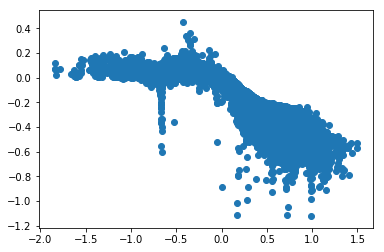

In [86]:
plt.scatter(test_data[input_cols["temperature_scale"]]["potential temperature skin change_10 m_K m-1"], slm_preds["temperature_scale-random_forest"])

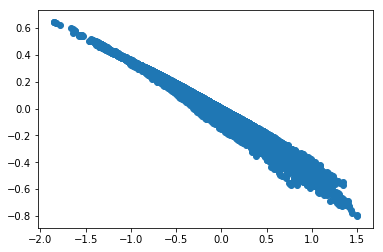

In [87]:
plt.scatter(test_data[input_cols["temperature_scale"]]["potential temperature skin change_10 m_K m-1"], slm_preds["temperature_scale-mo"])

(-1.2, 0.5)

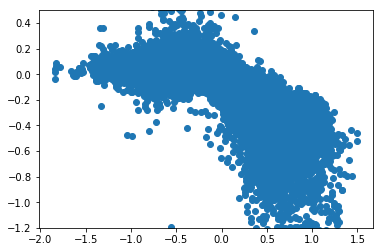

In [89]:
plt.scatter(test_data[input_cols["temperature_scale"]]["potential temperature skin change_10 m_K m-1"], 
            slm_preds["temperature scale_surface_K"])
plt.ylim(-1.2, 0.5)

In [36]:
def partial_dependence_1d(x, model, var_index, var_vals):
    """
    Calculate how the mean prediction of an ML model varies if one variable's value is fixed across all input
    examples.

    Args:
        x: array of input variables
        model: scikit-learn style model object
        var_index: column index of the variable being investigated
        var_vals: values of the input variable that are fixed.

    Returns:
        Array of partial dependence values.
    """
    partial_dependence = np.zeros(var_vals.shape)
    pd_sd = np.zeros(var_vals.shape)
    x_copy = np.copy(x)
    for v, var_val in enumerate(var_vals):
        x_copy[:, var_index] = var_val
        preds = model.predict(x_copy)
        partial_dependence[v] = preds.mean()
        pd_sd[v] = preds.std()
    return partial_dependence, pd_sd

In [37]:
pd_points = 20
pd_vals_rf = {}
pd_sd_rf = {}
pd_in = {}
pd_in_rf = {}
pd_vals_nn = {}
pd_sd_nn = {}
for output_type in config["output_types"]:
    print(output_type)
    scaled_sub = scalers[output_type].transform(sub_test[input_cols[output_type]])
    print(scaled_sub.min(axis=1))
    pd_in[output_type] = np.zeros((len(input_cols[output_type]), pd_points))
    pd_in_rf[output_type] = np.zeros((len(input_cols[output_type]), pd_points))

    pd_vals_rf[output_type] = np.zeros((len(input_cols[output_type]), pd_points))
    pd_sd_rf[output_type] = np.zeros((len(input_cols[output_type]), pd_points))

    pd_vals_nn[output_type] = np.zeros((len(input_cols[output_type]), pd_points))
    pd_sd_nn[output_type] = np.zeros((len(input_cols[output_type]), pd_points))
    for i, input_col in enumerate(input_cols[output_type]):
        print(input_col)
        pd_in[output_type][i] = np.linspace(scaled_sub[:, i].min(), 
                                            scaled_sub[:, i].max(), pd_points)
        pd_in_rf[output_type][i] = np.linspace(sub_test[input_col].min(), 
                                            sub_test[input_col].max(), pd_points)
        pd_vals_rf[output_type][i], pd_sd_rf[output_type][i] = partial_dependence_1d(sub_test[input_cols[output_type]], 
                                                           random_forests[output_type], 
                                                           i, pd_in_rf[output_type][i])
        pd_vals_nn[output_type][i], pd_sd_nn[output_type][i] = partial_dependence_1d(scaled_sub, 
                                                           neural_nets[output_type], 
                                                           i, pd_in[output_type][i])

friction_velocity
[-2.46626613 -0.9266705  -0.82414744 ... -0.48796401 -0.59991108
 -0.68269786]
wind speed_10 m_m s-1
wind speed_20 m_m s-1
potential temperature skin change_10 m_K m-1
bulk richardson_10 m_
pressure_2 m_hPa
global horizontal irradiance_0 m_W m-2
zenith_0 m_degrees
temperature_scale
[-2.46626613 -0.9266705  -0.86704194 ... -0.48796401 -0.59991108
 -0.68269786]
potential temperature skin change_10 m_K m-1
potential temperature skin change_20 m_K m-1
pressure_2 m_hPa
global horizontal irradiance_0 m_W m-2
zenith_0 m_degrees
bulk richardson_10 m_
wind speed_10 m_m s-1
wind speed_20 m_m s-1
moisture_scale
[-2.46626613 -0.9266705  -0.59991108 ... -0.48796401 -1.06653594
 -1.36546685]
mixing ratio skin change_10 m_g kg-1 m-1
mixing ratio skin change_20 m_g kg-1 m-1
moisture availability_3 cm_
pressure_2 m_hPa
global horizontal irradiance_0 m_W m-2
zenith_0 m_degrees
bulk richardson_10 m_
wind speed_10 m_m s-1
wind speed_20 m_m s-1


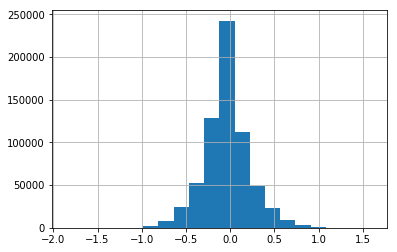

In [46]:
data["potential temperature skin change_10 m_K m-1"].hist(bins=20)

(array([[1.90000e+01, 4.00000e+00,         nan,         nan,         nan,
                 nan,         nan,         nan,         nan,         nan],
        [        nan, 1.78000e+02, 7.00000e+00,         nan,         nan,
                 nan,         nan,         nan,         nan,         nan],
        [        nan, 5.60000e+01, 1.81700e+03, 1.15000e+02,         nan,
                 nan,         nan,         nan,         nan,         nan],
        [        nan,         nan, 9.62000e+02, 3.08420e+04, 9.15000e+02,
                 nan,         nan,         nan,         nan,         nan],
        [        nan,         nan,         nan, 5.23100e+03, 1.57368e+05,
         1.79760e+04,         nan,         nan,         nan,         nan],
        [        nan,         nan,         nan, 3.00000e+00, 1.88900e+03,
         3.42222e+05, 1.08440e+04,         nan,         nan,         nan],
        [        nan,         nan,         nan,         nan,         nan,
         2.50000e+01, 6.91930e+0

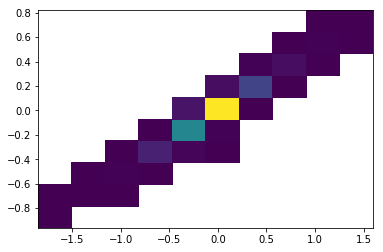

In [48]:
plt.hist2d(data["potential temperature skin change_10 m_K m-1"], 
           data["potential temperature skin change_20 m_K m-1"], cmin=1)

In [122]:
pd_vals_rf["moisture_scale"].shape

(14, 10)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


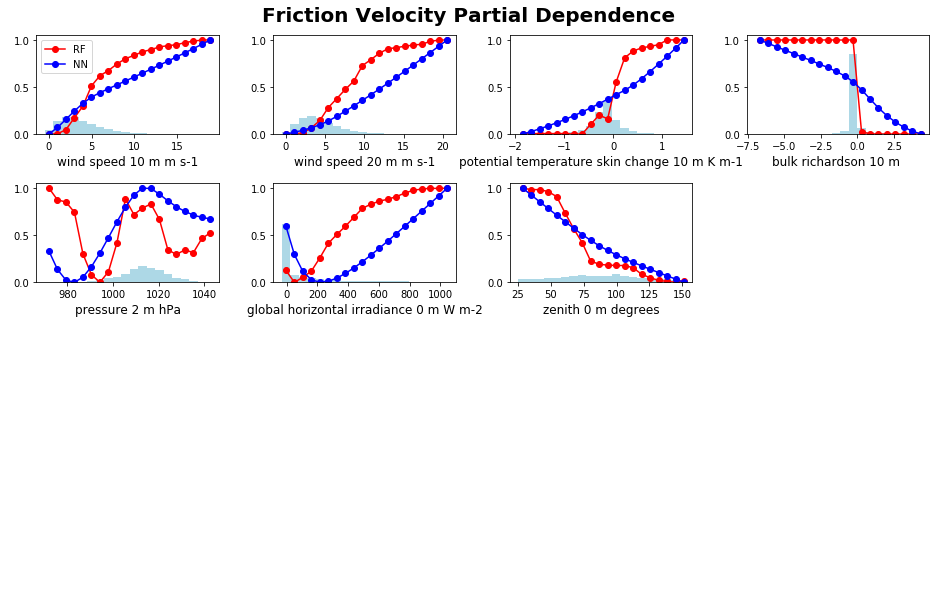

In [38]:
fig, axes = plt.subplots(4, 4, figsize=(16, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
output_type= "friction_velocity"
un_scaled_in = scalers[output_type].inverse_transform(pd_in[output_type].T).T
for a, ax in enumerate(axes.ravel()):
    print(a)
    if a < len(input_cols[output_type]):
        rf_pd_col = (pd_vals_rf[output_type][a] - pd_vals_rf[output_type][a].min()) / (
            pd_vals_rf[output_type][a].max() - pd_vals_rf[output_type][a].min())
        #rf_pd_col_sd = (pd_sd_rf[output_type][a] - pd_vals_rf[output_type][a].min()) / (
        #    pd_vals_rf[output_type][a].max() - pd_vals_rf[output_type][a].min())
        nn_pd_col = (pd_vals_nn[output_type][a] - pd_vals_nn[output_type][a].min()) / (
            pd_vals_nn[output_type][a].max() - pd_vals_nn[output_type][a].min())
        #ax.fill_between(un_scaled_in[a], rf_pd_col_sd + rf_pd_col, -rf_pd_col_sd + rf_pd_col, color='r', alpha=0.5)
        ax.plot(un_scaled_in[a], rf_pd_col, 'ro-', label="RF")
        ax.plot(un_scaled_in[a], nn_pd_col, 'bo-', label="NN")

        ax.set_xlabel(input_cols[output_type][a].replace("_", " "), fontsize=12)
        in_hist, _ = np.histogram(sub_test[input_cols[output_type][a]], bins=un_scaled_in[a])
        ax.bar(un_scaled_in[a, :-1], 
               height=in_hist / in_hist.sum(), 
               width=un_scaled_in[a, 1:] - un_scaled_in[a, :-1], bottom=0, 
                                        color='lightblue')
        if a == 0:
            ax.legend()
    else:
        ax.axis("off")
fig.suptitle(output_type.replace("_", " ").title() + " Partial Dependence", fontsize=20, fontweight="bold", y=0.92)
plt.savefig(join(model_path, output_type + "_pdp.png"), dpi=200, bbox_inches="tight")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


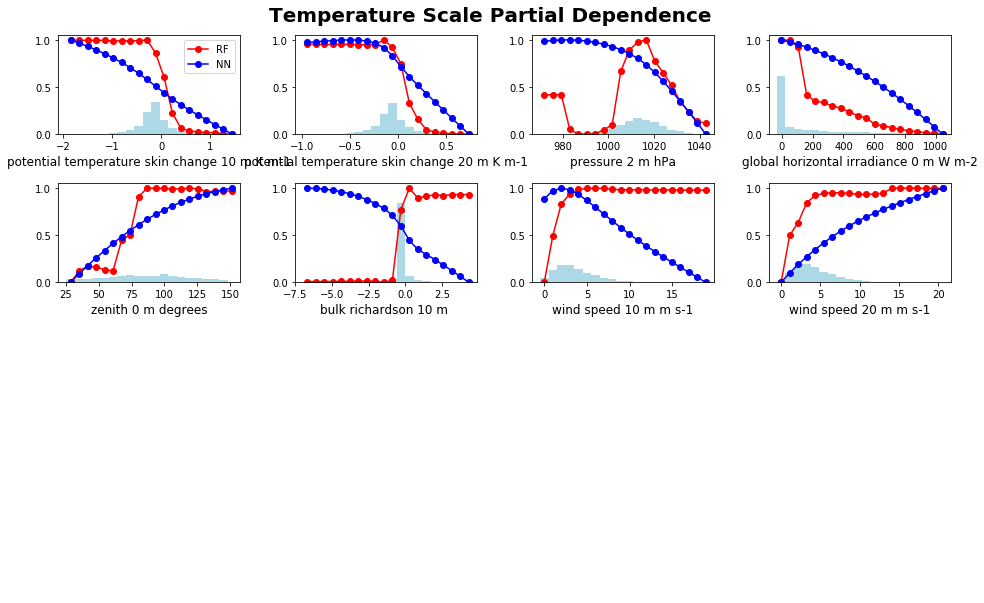

In [44]:
fig, axes = plt.subplots(4, 4, figsize=(16, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
output_type= "temperature_scale"
un_scaled_in = scalers[output_type].inverse_transform(pd_in[output_type].T).T
for a, ax in enumerate(axes.ravel()):
    print(a)
    if a < len(input_cols[output_type]):
        rf_pd_col = (pd_vals_rf[output_type][a] - pd_vals_rf[output_type][a].min()) / (
            pd_vals_rf[output_type][a].max() - pd_vals_rf[output_type][a].min())
        #rf_pd_col_sd = (pd_sd_rf[output_type][a] - pd_vals_rf[output_type][a].min()) / (
        #    pd_vals_rf[output_type][a].max() - pd_vals_rf[output_type][a].min())
        nn_pd_col = (pd_vals_nn[output_type][a] - pd_vals_nn[output_type][a].min()) / (
            pd_vals_nn[output_type][a].max() - pd_vals_nn[output_type][a].min())
        #ax.fill_between(un_scaled_in[a], rf_pd_col_sd + rf_pd_col, -rf_pd_col_sd + rf_pd_col, color='r', alpha=0.5)
        ax.plot(un_scaled_in[a], rf_pd_col, 'ro-', label="RF")
        ax.plot(un_scaled_in[a], nn_pd_col, 'bo-', label="NN")

        ax.set_xlabel(input_cols[output_type][a].replace("_", " "), fontsize=12)
        in_hist, _ = np.histogram(sub_test[input_cols[output_type][a]], bins=un_scaled_in[a])
        ax.bar(un_scaled_in[a, :-1], 
               height=in_hist / in_hist.sum(), 
               width=un_scaled_in[a, 1:] - un_scaled_in[a, :-1], bottom=0, 
                                        color='lightblue')
        if a == 0:
            ax.legend()
    else:
        ax.axis("off")
fig.suptitle(output_type.replace("_", " ").title() + " Partial Dependence", fontsize=20, fontweight="bold", y=0.92)
plt.savefig(join(model_path, output_type + "_pdp.png"), dpi=200, bbox_inches="tight")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


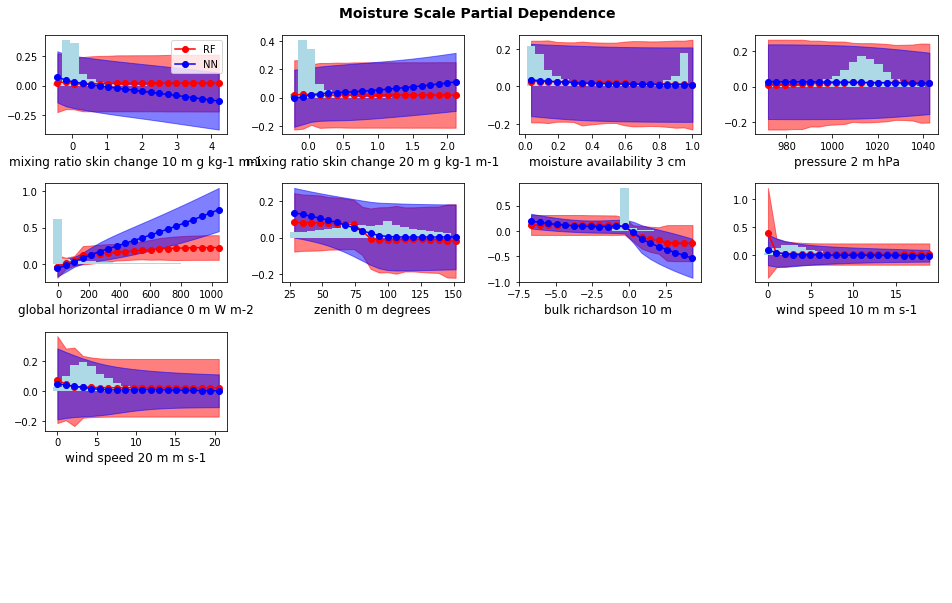

In [40]:
fig, axes = plt.subplots(4, 4, figsize=(16, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
output_type= "moisture_scale"
un_scaled_in = scalers[output_type].inverse_transform(pd_in[output_type].T).T
for a, ax in enumerate(axes.ravel()):
    print(a)
    if a < len(input_cols[output_type]):
        #rf_pd_col = (pd_vals_rf[output_type][a] - pd_vals_rf[output_type][a].min()) / (
        #    pd_vals_rf[output_type][a].max() - pd_vals_rf[output_type][a].min())
        #rf_pd_col_sd = (pd_sd_rf[output_type][a] - pd_vals_rf[output_type][a].min()) / (
        #    pd_vals_rf[output_type][a].max() - pd_vals_rf[output_type][a].min())
        #nn_pd_col = (pd_vals_nn[output_type][a] - pd_vals_nn[output_type][a].min()) / (
        #    pd_vals_nn[output_type][a].max() - pd_vals_nn[output_type][a].min())
        ax.fill_between(un_scaled_in[a], pd_vals_rf[output_type][a] + pd_sd_rf[output_type][a], 
                        pd_vals_rf[output_type][a] - pd_sd_rf[output_type][a], color='r', alpha=0.5)
        ax.fill_between(un_scaled_in[a], pd_vals_nn[output_type][a] + pd_sd_nn[output_type][a], 
                        pd_vals_nn[output_type][a] - pd_sd_nn[output_type][a], color='b', alpha=0.5)
        ax.plot(un_scaled_in[a], pd_vals_rf[output_type][a], 'ro-', label="RF")
        ax.plot(un_scaled_in[a], pd_vals_nn[output_type][a], 'bo-', label="NN")

        ax.set_xlabel(input_cols[output_type][a].replace("_", " "), fontsize=12)
        in_hist, _ = np.histogram(sub_test[input_cols[output_type][a]], bins=un_scaled_in[a])
        ax.bar(un_scaled_in[a, :-1], 
               height=in_hist / in_hist.sum(), 
               width=un_scaled_in[a, 1:] - un_scaled_in[a, :-1], bottom=0, 
                                        color='lightblue')
        if a == 0:
            ax.legend()
    else:
        ax.axis("off")
fig.suptitle(output_type.replace("_", " ").title() + " Partial Dependence", fontsize=14, fontweight="bold", y=0.92)
plt.savefig(join(model_path, output_type + "_pdp_full.png"), dpi=200, bbox_inches="tight")


In [244]:
class MORegressor(object):
    def __init__(self, out_index=0):
        self.out_index = out_index
        return
    
    def predict(self, x):
        outputs = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            outputs[i] = mo_similarity(*x[i])[self.out_index]
        return outputs

In [237]:
mo_input_cols = ['u wind_10 m_m s-1', 'v wind_10 m_m s-1', 
                 'skin temperature_0 m_K', 'temperature_2 m_K',
                'skin saturation mixing ratio_0 m_g kg-1', 'mixing ratio_2 m_g kg-1',
                 'pressure_2 m_hPa', 'moisture availability_3 cm_']
mo_test_data = test_data[mo_input_cols]
mo_test_data.loc[:, 'skin saturation mixing ratio_0 m_g kg-1'] = mo_test_data.loc[:, 'skin saturation mixing ratio_0 m_g kg-1']/ 1000
mo_test_data.loc[:, 'mixing ratio_2 m_g kg-1'] = mo_test_data.loc[:, 'mixing ratio_2 m_g kg-1'] / 1000

In [239]:
mo_test_data = mo_test_data.iloc[sub_indices]

In [246]:
pd_vals_mo = {}
pd_in_mo = {}
for o, output_type in enumerate(config["output_types"]):
    print(output_type)
    pd_in_mo[output_type] = np.zeros((len(mo_input_cols), pd_points))
    pd_vals_mo[output_type] = np.zeros((len(mo_input_cols), pd_points))
    for i, input_col in enumerate(mo_input_cols):
        print(input_col)
        mo_mod = MORegressor(o)
        pd_in_mo[output_type][i] = np.linspace(mo_test_data.iloc[:, i].min(), 
                                            mo_test_data.iloc[:, i].max(), pd_points)
        pd_vals_mo[output_type][i] = partial_dependence_1d(mo_test_data.values, 
                                                           mo_mod, 
                                                           i, pd_in_mo[output_type][i])

friction_velocity
u wind_10 m_m s-1
v wind_10 m_m s-1
skin temperature_0 m_K
temperature_2 m_K
skin saturation mixing ratio_0 m_g kg-1
mixing ratio_2 m_g kg-1
pressure_2 m_hPa
moisture availability_3 cm_
temperature_scale
u wind_10 m_m s-1
v wind_10 m_m s-1
skin temperature_0 m_K
temperature_2 m_K
skin saturation mixing ratio_0 m_g kg-1
mixing ratio_2 m_g kg-1
pressure_2 m_hPa
moisture availability_3 cm_
moisture_scale
u wind_10 m_m s-1
v wind_10 m_m s-1
skin temperature_0 m_K
temperature_2 m_K
skin saturation mixing ratio_0 m_g kg-1
mixing ratio_2 m_g kg-1
pressure_2 m_hPa
moisture availability_3 cm_


0
1
2
3
4
5
6
7


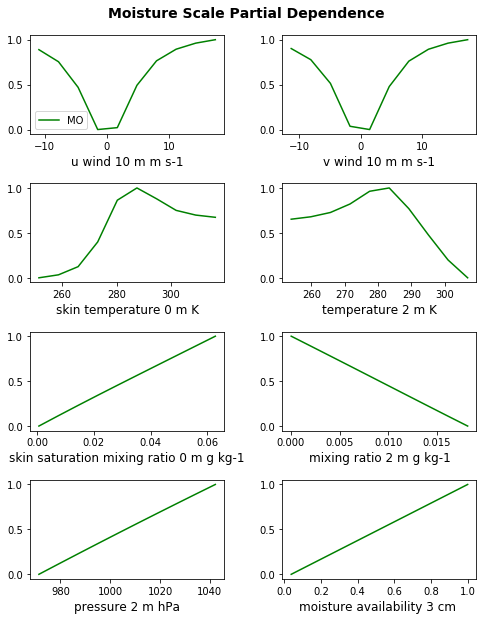

In [258]:
fig, axes = plt.subplots(4, 2, figsize=(8, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
output_type= "moisture_scale"
for a, ax in enumerate(axes.ravel()):
    print(a)
    if a < len(input_cols[output_type]):
        mo_pd_col = (pd_vals_mo[output_type][a] - pd_vals_mo[output_type][a].min()) / (
            pd_vals_mo[output_type][a].max() - pd_vals_mo[output_type][a].min())
        #mo_pd_col = pd_vals_mo[output_type][a]
        ax.plot(pd_in_mo[output_type][a], mo_pd_col, 'g-', label="MO")

        ax.set_xlabel(mo_input_cols[a].replace("_", " "), fontsize=12)
        #in_hist, _ = np.histogram(mo_test[mo_input_cols[output_type][a]], bins=un_scaled_in[a])
        #ax.bar(un_scaled_in[a, :-1], 
        #       height=in_hist / in_hist.sum(), 
        #       width=un_scaled_in[a, 1:] - un_scaled_in[a, :-1], bottom=0, 
        #                                color='lightblue')
        if a == 0:
            ax.legend()
    else:
        ax.axis("off")
fig.suptitle(output_type.replace("_", " ").title() + " Partial Dependence", fontsize=14, fontweight="bold", y=0.92)
plt.savefig(join(model_path, output_type + "_pdp_mo.png"), dpi=200, bbox_inches="tight")


In [106]:
import traceback
def feature_importance(x, y, model, metric_function, x_columns=None, permutations=30, processes=1, seed=8272):
    """
    Calculate permutation feature importance scores for an arbitrary machine learning model.

    Args:
        x: ndarray of dimension (n_examples, n_features) that contains the input data for the ML model.
        y: ndarray of dimension (n_examples, ) that contains the true target values.
        model: machine learning model object in scikit-learn format (contains fit and predict methods).
        metric_function: scoring function with the input format (y_true, y_predicted) to match scikit-learn.
        x_columns (ndarray or None): list or array of column names. If not provided, indices will be used instead.
        permutations (int): Number of times a column is randomly shuffled.
        processes (int): Number of multiprocessor processes used for parallel computation of importances
        seed (int): Random seed.

    Returns:
        pandas DataFrame of dimension (n_columns, permutations) that contains the change in score
        for each column and permutation.
    """
    if x_columns is None:
        x_columns = np.arange(x.shape[1])
    if type(x_columns) == list:
        x_columns = np.array(x_columns)
    predictions = model.predict(x)
    score = metric_function(y, predictions)
    print(score)
    np.random.seed(seed=seed)
    perm_matrix = np.zeros((x_columns.shape[0], permutations))

    def update_perm_matrix(result):
        perm_matrix[result[0]] = result[1]
    if processes > 1:
        pool = Pool(processes)
        for c in range(len(x_columns)):
            pool.apply_async(feature_importance_column,
                             (x, y, c, permutations, deepcopy(model), metric_function, np.random.randint(0, 100000)),
                              callback=update_perm_matrix)
        pool.close()
        pool.join()
    else:
        for c in range(len(x_columns)):
            result = feature_importance_column(x, y, c, permutations, model,
                                               metric_function, np.random.randint(0, 100000))
            update_perm_matrix(result)
    diff_matrix = score - perm_matrix
    return pd.DataFrame(diff_matrix, index=x_columns, columns=np.arange(permutations))


def feature_importance_column(x, y, column_index, permutations, model, metric_function, seed):
    """
    Calculate the permutation feature importance score for a single input column. It is the error score on
    a given set of data after the values in one column have been shuffled among the different examples.

    Args:
        x: ndarray of dimension (n_examples, n_features) that contains the input data for the ML model.
        y: ndarray of dimension (n_examples, ) that contains the true target values.
        column_index: Index of the x column being permuted
        permutations: Number of permutations run to calculate importance score distribution
        model: machine learning model object in scikit-learn format (contains fit and predict methods).
        metric_function: scoring function with the input format (y_true, y_predicted) to match scikit-learn.
        seed (int): random seed.

    Returns:
        column_index, permutation, perm_score
    """
    try:
        #rs = np.random.RandomState(seed=seed)
        indices = np.arange(x.shape[0])
        perm_scores = np.zeros(permutations)
        x_perm = np.copy(x)
        x_pred = model.predict(x)
        for p in range(permutations):
            print(column_index, p)
            perm_indices = np.random.permutation(indices)
            x_perm[:, column_index] = x[perm_indices, column_index]
            perm_pred = model.predict(x_perm)
            perm_scores[p] = metric_function(y, perm_pred)
            print(perm_scores[p])
        return column_index, perm_scores
    except Exception as e:
        print(traceback.format_exc())
        raise e

In [124]:
output_type = "moisture_scale"
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rf_imp = feature_importance(train_data[input_cols[output_type]].values, train_data[output_cols[output_type]].values, 
                   random_forests[output_type], rmse, x_columns=input_cols[output_type], permutations=1)

0.10658335519033461
0 0
0.14536104740999164
1 0
0.1382020536810296
2 0
0.11923982436838104
3 0
0.13530606607617646
4 0
0.130350556263972
5 0
0.12496433740101752
6 0
0.19682829760655485
7 0
0.12388064217337276
8 0
0.12023848726080978
9 0
0.12672992114416315
10 0
0.16384434473455084
11 0
0.14534076252404005
12 0
0.11902684573784085
13 0
0.11681071303461739


In [126]:
rf_imp.sort_values(by=0)

,0
global horizontal irradiance_0 m_W m-2,-0.090245
bulk richardson_10 m_,-0.057261
wind speed_10 m_m s-1,-0.038778
zenith_0 m_degrees,-0.038757
wind speed_20 m_m s-1,-0.031619
temperature change_15 m_K m-1,-0.028723
skin virtual potential temperature_0 m_K,-0.023767
moisture availability_3 cm_,-0.020147
skin saturation mixing ratio_0 m_g kg-1,-0.018381
virtual potential temperature_10 m_K,-0.017297


In [129]:
pd.DataFrame(random_forests[output_type].feature_importances_, index=input_cols[output_type]).sort_values(by=0)[::-1]

,0
global horizontal irradiance_0 m_W m-2,0.216748
bulk richardson_10 m_,0.163865
zenith_0 m_degrees,0.128889
temperature change_15 m_K m-1,0.095639
wind speed_10 m_m s-1,0.064468
skin saturation mixing ratio_0 m_g kg-1,0.061715
skin virtual potential temperature_0 m_K,0.059160
wind speed_20 m_m s-1,0.056278
virtual potential temperature_10 m_K,0.034400
virtual potential temperature_20 m_K,0.033658


In [45]:
sub_test[input_cols[output_type]].values[:, -1].min()

28.539912717676987